
# Random Forest — Decision Boundaries & Hyperparameters

This notebook generates a synthetic 2D dataset and visualizes **Random Forest** classifiers across several configurations:

1) Baseline: `n_estimators=200`, `max_depth=None`, `min_samples_leaf=1`, `max_features='sqrt'`  
2) Number of trees: `n_estimators ∈ {10, 50, 100, 300}`  
3) Max depth: `max_depth ∈ {2, 4, 6, None}`  
4) Minimum samples per leaf: `min_samples_leaf ∈ {1, 5, 20, 100}`  
5) Max features per split: `max_features ∈ {'sqrt', 'log2', 1.0}` (1.0 = all features)  
6) Class weighting: `class_weight='balanced'`  
7) Out-of-bag (OOB) estimate: `oob_score=True`  

Each configuration is trained and plotted with:
- **Decision regions** (predicted class)
- **Probability contours** (levels 0.1, 0.3, 0.5, 0.7, 0.9)
- **Training and test points**

We also include:
- **Gini feature importance** bar chart
- **Permutation importance** with uncertainty (error bars)


In [1]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

np.random.seed(21)

# Generate a nonlinear dataset
X, y = make_moons(n_samples=200, noise=0.5, random_state=21)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=21, stratify=y
)

def plot_boundary_rf(clf, X_tr, y_tr, X_te, y_te, title):
    # Grid
    x_min, x_max = X[:,0].min()-0.8, X[:,0].max()+0.8
    y_min, y_max = X[:,1].min()-0.8, X[:,1].max()+0.8
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    XY = np.c_[xx.ravel(), yy.ravel()]

    # Predict probabilities for class 1
    P = clf.predict_proba(XY)[:,1].reshape(xx.shape)

    # Plot decision regions and probability contours
    plt.figure(figsize=(6,5))
    plt.contourf(xx, yy, P>=0.5, alpha=0.15)
    CS = plt.contour(xx, yy, P, levels=[0.1,0.3,0.5,0.7,0.9], linestyles=["--","--","-","--","--"])
    plt.clabel(CS, inline=True, fontsize=8, fmt="p=%.1f")

    # Points
    plt.scatter(X_tr[:,0], X_tr[:,1], s=12, alpha=0.7, label="train")
    plt.scatter(X_te[:,0], X_te[:,1], s=16, alpha=0.9, marker="x", label="test")

    acc_tr = accuracy_score(y_tr, clf.predict(X_tr))
    acc_te = accuracy_score(y_te, clf.predict(X_te))
    title_extra = title
    if hasattr(clf, "oob_score_"):
        title_extra += f" | oob={clf.oob_score_:.3f}"
    plt.title(f"{title_extra}")
    print(f"{title_extra}\naccuracy(train)={acc_tr:.3f} | accuracy(test)={acc_te:.3f}")
    plt.xlabel("x1"); plt.ylabel("x2"); plt.legend(loc="lower right")
    plt.tight_layout(); plt.show()


## 1) Baseline: 200 trees, sqrt features

RandomForest baseline
accuracy(train)=1.000 | accuracy(test)=0.820


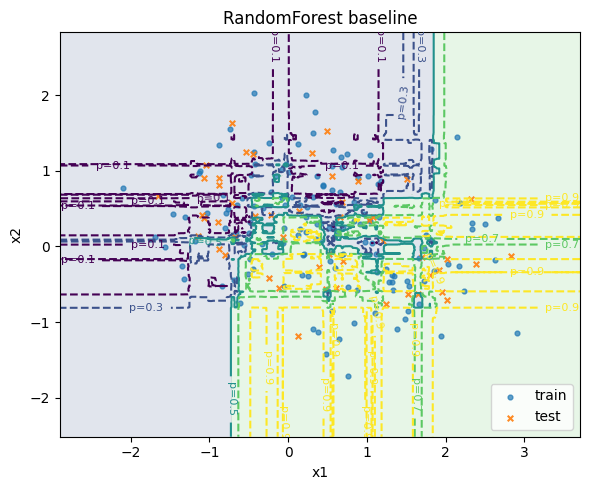

In [2]:

rf_base = RandomForestClassifier(
    n_estimators=200, max_depth=None, min_samples_leaf=1,
    max_features="sqrt", random_state=21, n_jobs=-1
)
rf_base.fit(X_train, y_train)
plot_boundary_rf(rf_base, X_train, y_train, X_test, y_test, "RandomForest baseline")


## 2) Number of trees sweep

RandomForest n_estimators=10
accuracy(train)=0.987 | accuracy(test)=0.740


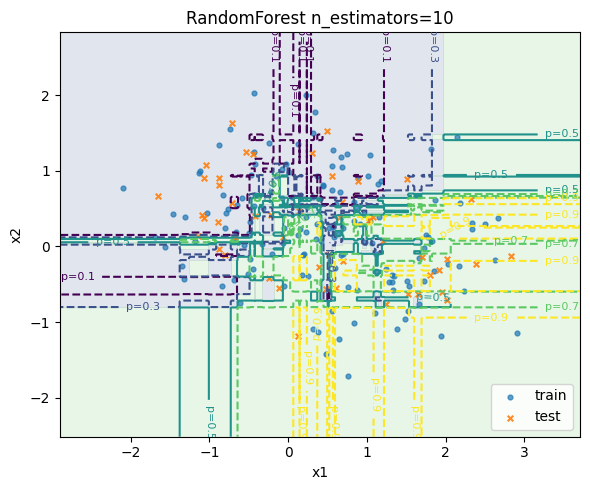

RandomForest n_estimators=50
accuracy(train)=1.000 | accuracy(test)=0.820


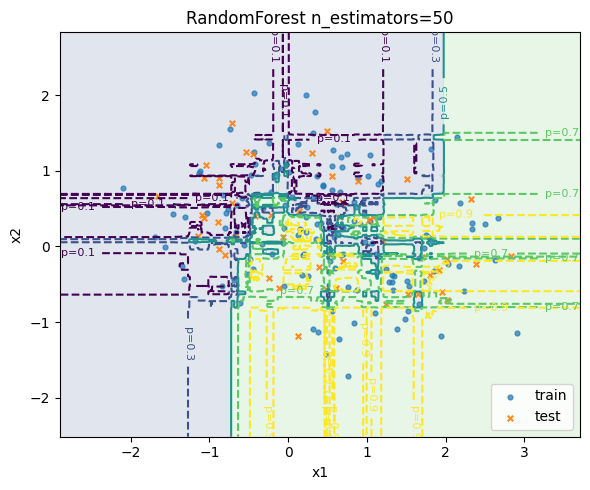

RandomForest n_estimators=100
accuracy(train)=1.000 | accuracy(test)=0.820


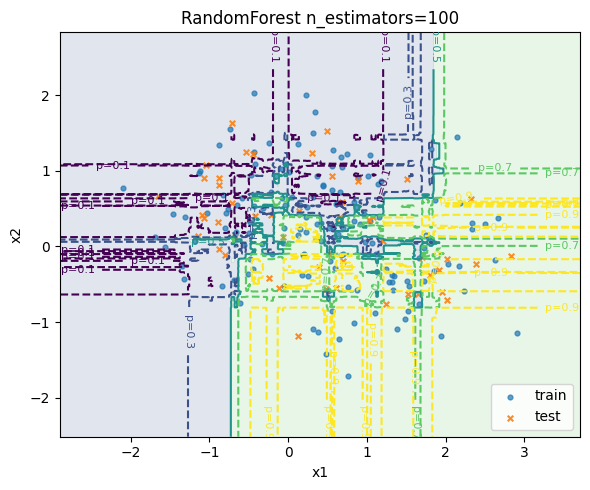

RandomForest n_estimators=300
accuracy(train)=1.000 | accuracy(test)=0.820


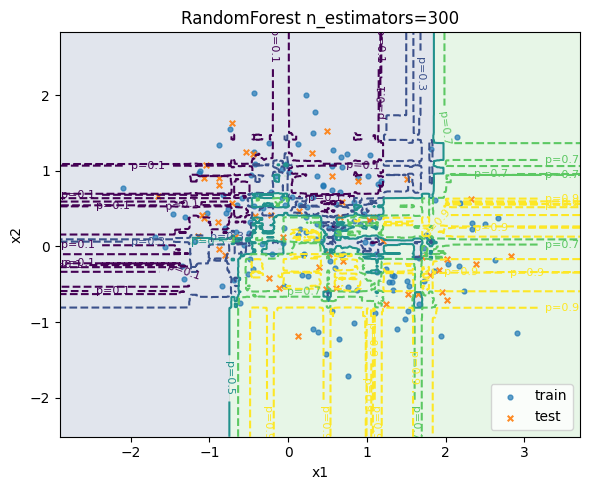

In [3]:

for n in [10, 50, 100, 300]:
    rf = RandomForestClassifier(
        n_estimators=n, max_depth=None, min_samples_leaf=1,
        max_features="sqrt", random_state=21, n_jobs=-1
    )
    rf.fit(X_train, y_train)
    plot_boundary_rf(rf, X_train, y_train, X_test, y_test, f"RandomForest n_estimators={n}")


## 3) Max depth sweep

RandomForest max_depth=2
accuracy(train)=0.840 | accuracy(test)=0.860


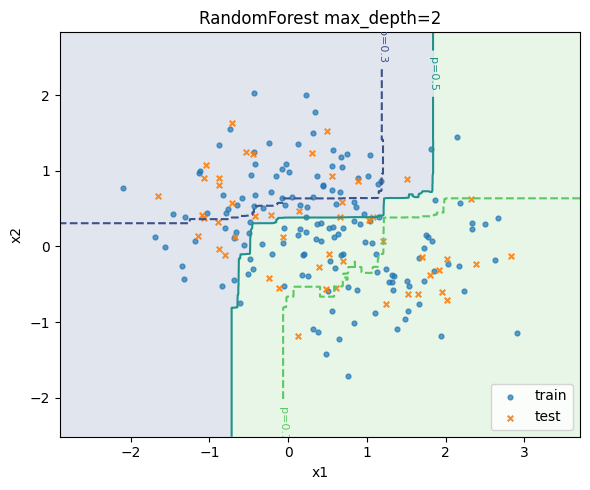

RandomForest max_depth=4
accuracy(train)=0.840 | accuracy(test)=0.860


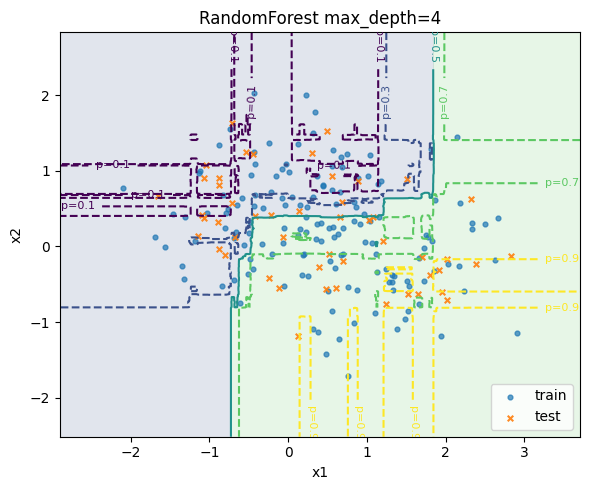

RandomForest max_depth=6
accuracy(train)=0.973 | accuracy(test)=0.840


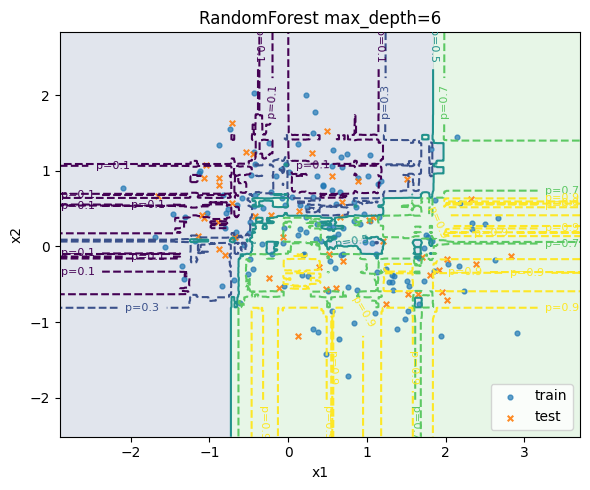

RandomForest max_depth=None
accuracy(train)=1.000 | accuracy(test)=0.820


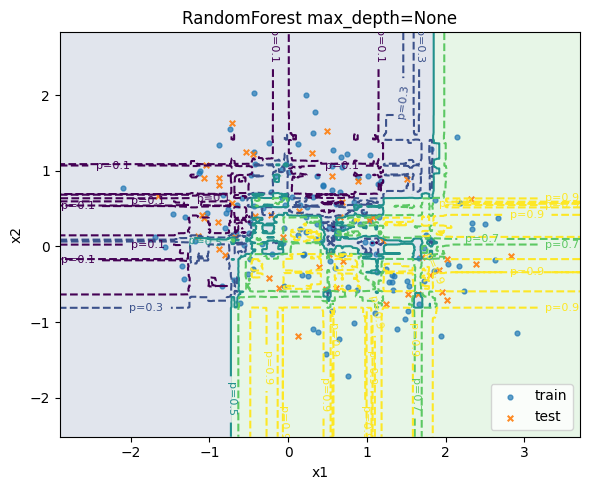

In [4]:

for d in [2, 4, 6, None]:
    rf = RandomForestClassifier(
        n_estimators=200, max_depth=d, min_samples_leaf=1,
        max_features="sqrt", random_state=21, n_jobs=-1
    )
    rf.fit(X_train, y_train)
    plot_boundary_rf(rf, X_train, y_train, X_test, y_test, f"RandomForest max_depth={d}")


## 4) Minimum samples per leaf sweep

RandomForest min_samples_leaf=1
accuracy(train)=1.000 | accuracy(test)=0.820


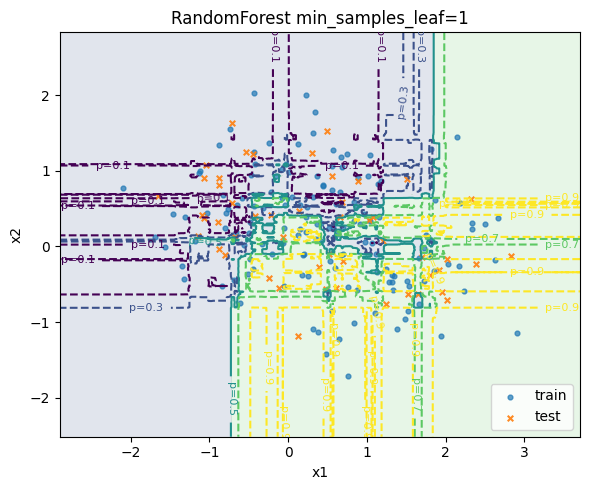

RandomForest min_samples_leaf=5
accuracy(train)=0.893 | accuracy(test)=0.860


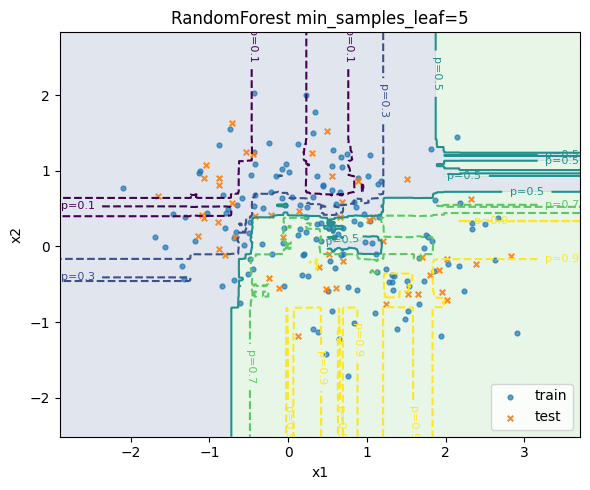

RandomForest min_samples_leaf=20
accuracy(train)=0.807 | accuracy(test)=0.840


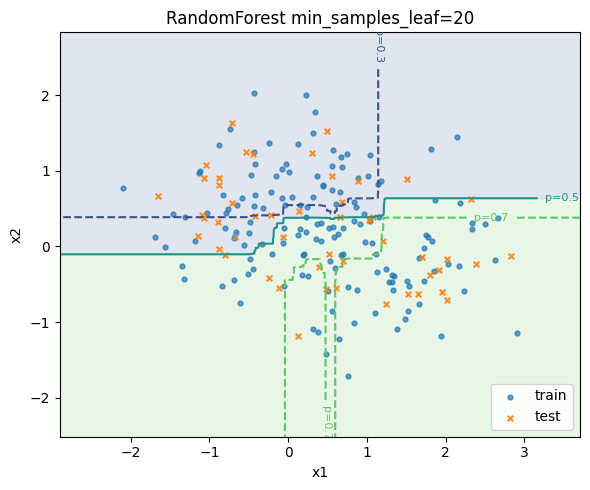

RandomForest min_samples_leaf=100
accuracy(train)=0.500 | accuracy(test)=0.500


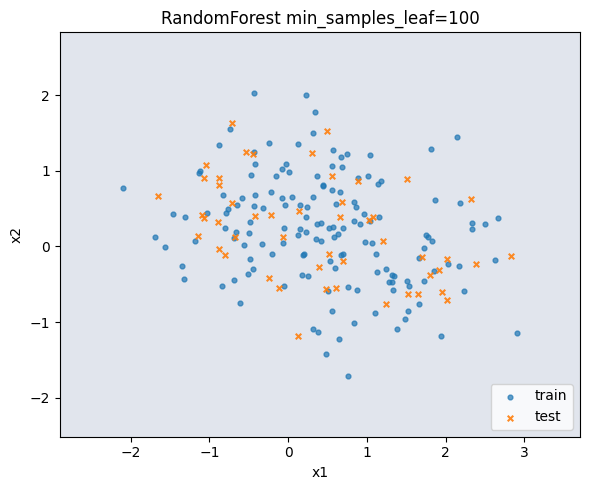

In [5]:

for m in [1, 5, 20, 100]:
    rf = RandomForestClassifier(
        n_estimators=200, max_depth=None, min_samples_leaf=m,
        max_features="sqrt", random_state=21, n_jobs=-1
    )
    rf.fit(X_train, y_train)
    plot_boundary_rf(rf, X_train, y_train, X_test, y_test, f"RandomForest min_samples_leaf={m}")


## 5) Max features per split sweep

RandomForest max_features=sqrt
accuracy(train)=1.000 | accuracy(test)=0.820


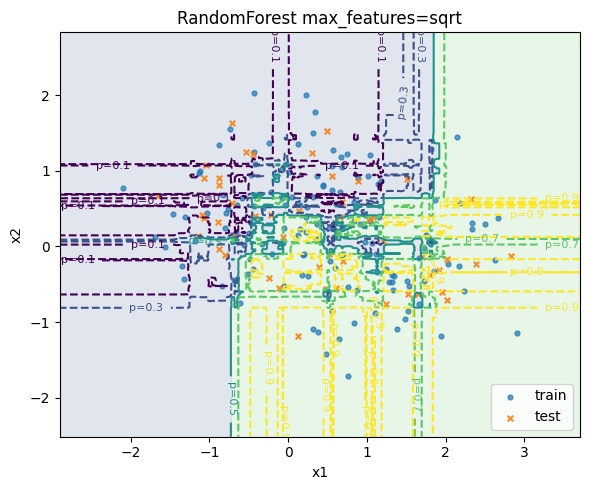

RandomForest max_features=log2
accuracy(train)=1.000 | accuracy(test)=0.820


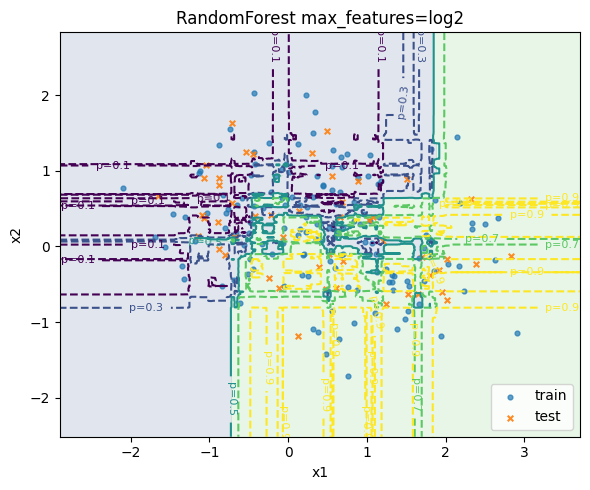

RandomForest max_features=1.0
accuracy(train)=1.000 | accuracy(test)=0.800


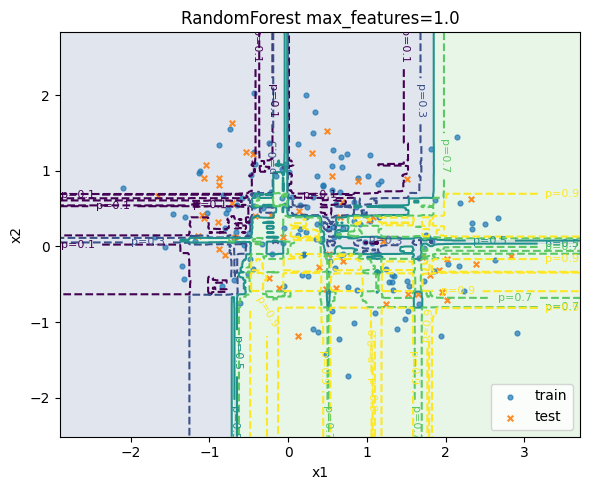

In [6]:

for mf in ["sqrt", "log2", 1.0]:
    rf = RandomForestClassifier(
        n_estimators=200, max_depth=None, min_samples_leaf=1,
        max_features=mf, random_state=21, n_jobs=-1
    )
    rf.fit(X_train, y_train)
    plot_boundary_rf(rf, X_train, y_train, X_test, y_test, f"RandomForest max_features={mf}")


## 6) Class weighting: balanced

RandomForest class_weight=balanced
accuracy(train)=1.000 | accuracy(test)=0.820


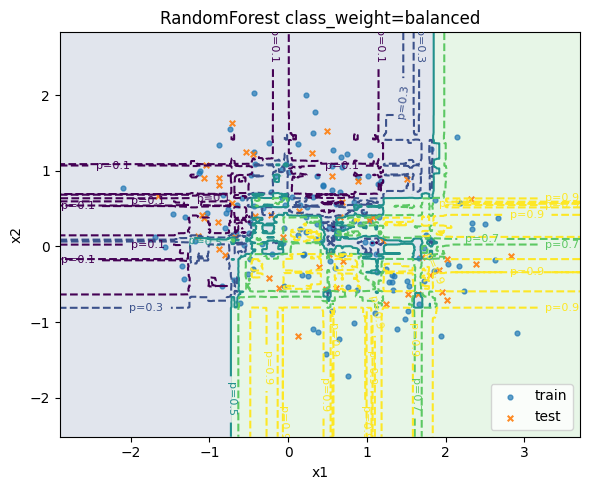

In [7]:

rf_bal = RandomForestClassifier(
    n_estimators=200, max_depth=None, min_samples_leaf=1,
    max_features="sqrt", class_weight="balanced",
    random_state=21, n_jobs=-1
)
rf_bal.fit(X_train, y_train)
plot_boundary_rf(rf_bal, X_train, y_train, X_test, y_test, "RandomForest class_weight=balanced")


## 7) Out-of-bag (OOB) estimate

OOB score: 0.78
RandomForest with OOB estimate | oob=0.780
accuracy(train)=1.000 | accuracy(test)=0.820


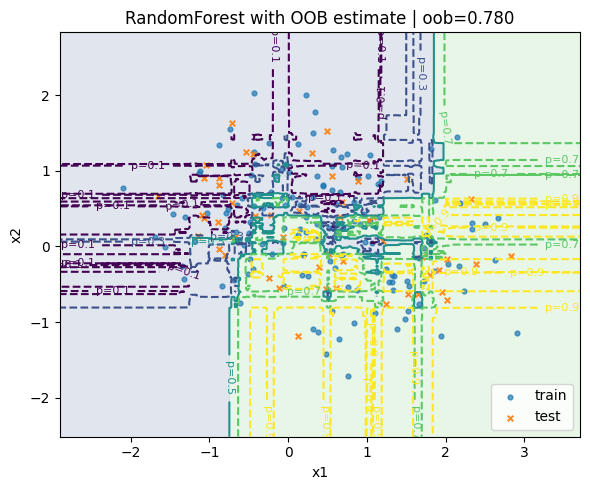

In [8]:

rf_oob = RandomForestClassifier(
    n_estimators=300, max_depth=None, min_samples_leaf=1,
    max_features="sqrt", oob_score=True,
    bootstrap=True, random_state=21, n_jobs=-1
)
rf_oob.fit(X_train, y_train)
print("OOB score:", rf_oob.oob_score_)
plot_boundary_rf(rf_oob, X_train, y_train, X_test, y_test, "RandomForest with OOB estimate")


## 8) Feature importances (Gini)

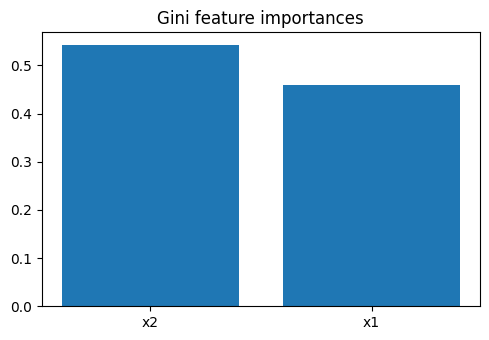

In [9]:

rf_imp = RandomForestClassifier(
    n_estimators=300, max_depth=None, min_samples_leaf=1,
    max_features="sqrt", random_state=21, n_jobs=-1
)
rf_imp.fit(X_train, y_train)
imps = rf_imp.feature_importances_
names = np.array(["x1","x2"])
order = np.argsort(imps)[::-1]

plt.figure(figsize=(5,3.5))
plt.bar(range(len(imps)), imps[order], tick_label=names[order])
plt.title("Gini feature importances")
plt.tight_layout(); plt.show()


## 9) Permutation importances (with uncertainty)

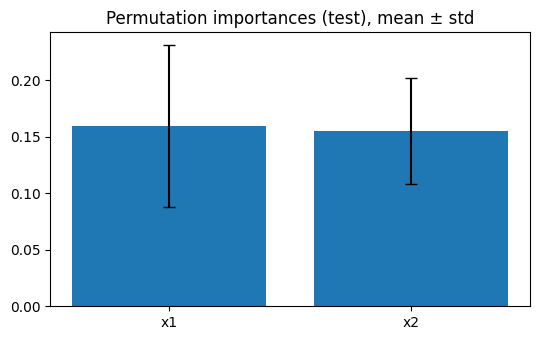

In [10]:

pi = permutation_importance(rf_imp, X_test, y_test, n_repeats=30, random_state=21, n_jobs=-1)
means = pi.importances_mean
stds  = pi.importances_std
names = np.array(["x1","x2"])
order = np.argsort(means)[::-1]

plt.figure(figsize=(5.5,3.5))
plt.bar(range(len(means)), means[order], yerr=stds[order], capsize=4, tick_label=names[order])
plt.title("Permutation importances (test), mean ± std")
plt.tight_layout(); plt.show()
